# Explore here

In [1]:
# Your code here

# Bibliotecas necesarias
import json
import zipfile
import os
import pandas as pd
from PIL import Image
import random



In [2]:
root_path = '/content'

In [3]:
!pip install kaggle
!mkdir ~/.kaggle
!touch '/root/.kaggle/kaggle.json'

In [4]:
## Appi token
api_token = {"username":"mariabottini","key":"b650b216bc3e51dd7fa6e3630cbca6db"}

In [5]:
with open("/root/.kaggle/kaggle.json", "w") as file:
 json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

# Paso 1: Carga del conjunto de datos

In [6]:
!kaggle competitions download -c dogs-vs-cats

100% 811M/812M [00:09<00:00, 79.2MB/s]
100% 812M/812M [00:09<00:00, 86.0MB/s]


In [7]:
for file in os.listdir():
 if file.endswith(".zip"):
  zip_ref = zipfile.ZipFile(file, "r")
  zip_ref.extractall()
  zip_ref.close()

In [8]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras.preprocessing import image
# Define los caminos a los archivos zip
train_zip_path = '/content/train.zip'
test_zip_path = '/content/test1.zip'
# Define los directorios donde se descomprimirán los archivos
train_dir = '/content/train'
test_dir = '/content/test1'
# Función para descomprimir archivos zip
def unzip_file(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
# Descomprime los archivos zip
unzip_file(train_zip_path, train_dir)
unzip_file(test_zip_path, test_dir)

In [9]:
train_dir = "/content/train/train"
test_dir = "/content/test1/test1"

Paso 2: Visualiza la información de entrada

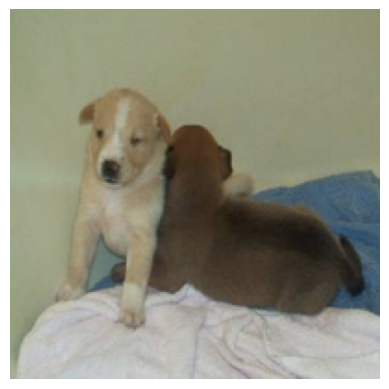

Dimensiones de la imagen: (349, 286)


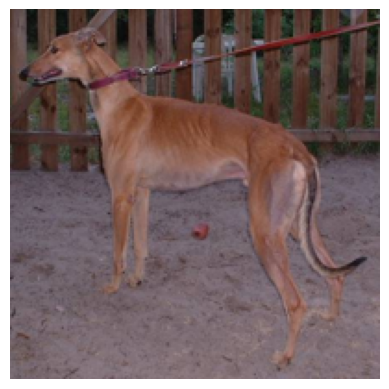

Dimensiones de la imagen: (439, 432)


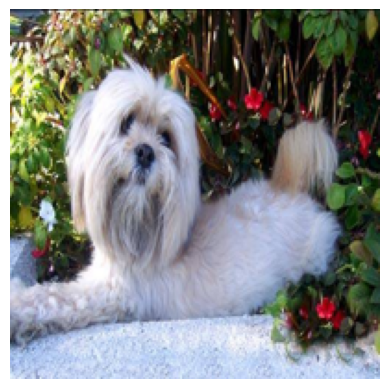

Dimensiones de la imagen: (499, 343)


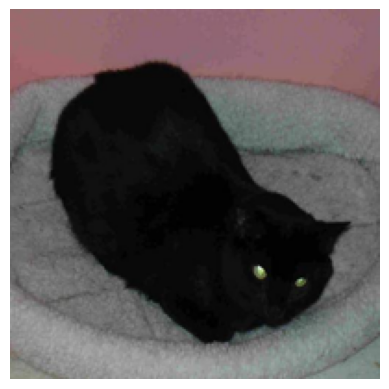

Dimensiones de la imagen: (499, 437)


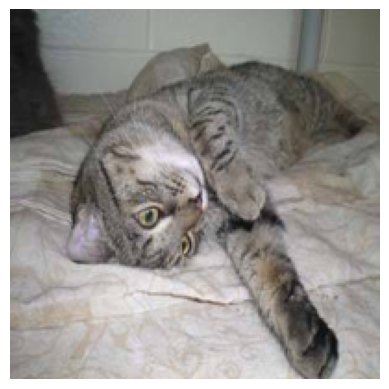

Dimensiones de la imagen: (300, 224)


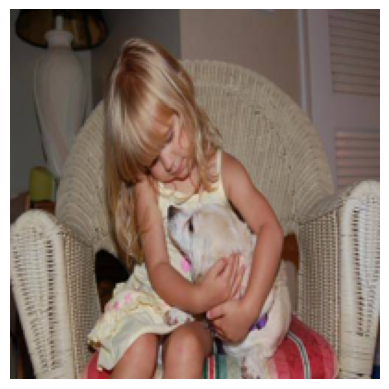

Dimensiones de la imagen: (499, 332)


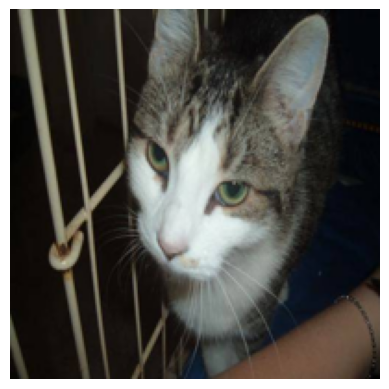

Dimensiones de la imagen: (499, 375)


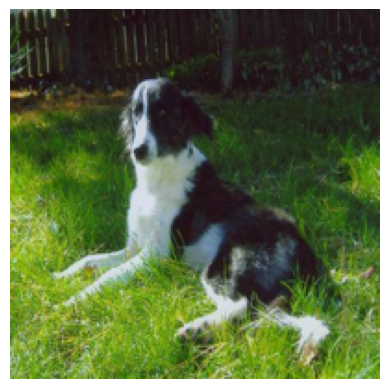

Dimensiones de la imagen: (500, 364)


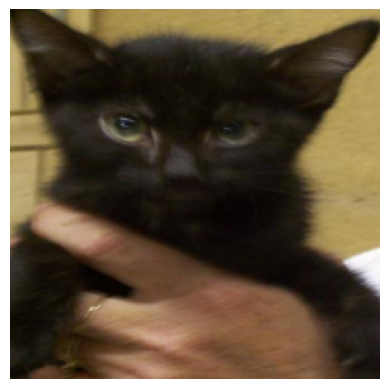

Dimensiones de la imagen: (333, 500)


In [10]:
from PIL import Image
import matplotlib.pyplot as plt

# Obtener una lista de archivos de imagen en el directorio de entrenamiento
train_images = os.listdir(train_dir)

# Función para mostrar una imagen y sus dimensiones
def show_image(image_path):
    image = Image.open(image_path)
    image_resized = image.resize((200, 200))
    plt.imshow(image_resized)
    plt.axis('off')
    plt.show()
    print(f'Dimensiones de la imagen: {image.size}')

# Mostrar las primeras 5 imágenes y sus dimensiones
for i in range(9):
    image_path = os.path.join(train_dir, train_images[i])
    show_image(image_path)


In [12]:
import pandas as pd

In [13]:


def load_images(folder, img_size=(200, 200), sample_count=20, label_filter=None):
    images = []
    labels = []
    filenames = os.listdir(folder)

    if label_filter is not None:
        filenames = [fname for fname in filenames if label_filter in fname]

    random.shuffle(filenames)
    for img in filenames[:sample_count]:
        try:
            img_path = os.path.join(folder, img)
            img_pil = Image.open(img_path)
            img_pil = img_pil.resize(img_size)
            img_np = np.array(img_pil) / 255.0  # Normalize pixel values
            images.append(img_np)
            labels.append(0 if 'cat' in img else 1)
        except Exception as e:
            print(f"Error loading image {img}: {e}")

    return np.array(images), np.array(labels)

In [14]:
def visualize_images(images, labels, sample_count=20):
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    axes = axes.flatten()

    for i in range(sample_count):
        axes[i].imshow(images[i])
        axes[i].set_title('Cat' if labels[i] == 0 else 'Dog')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

IndexError: index 9 is out of bounds for axis 0 with size 9

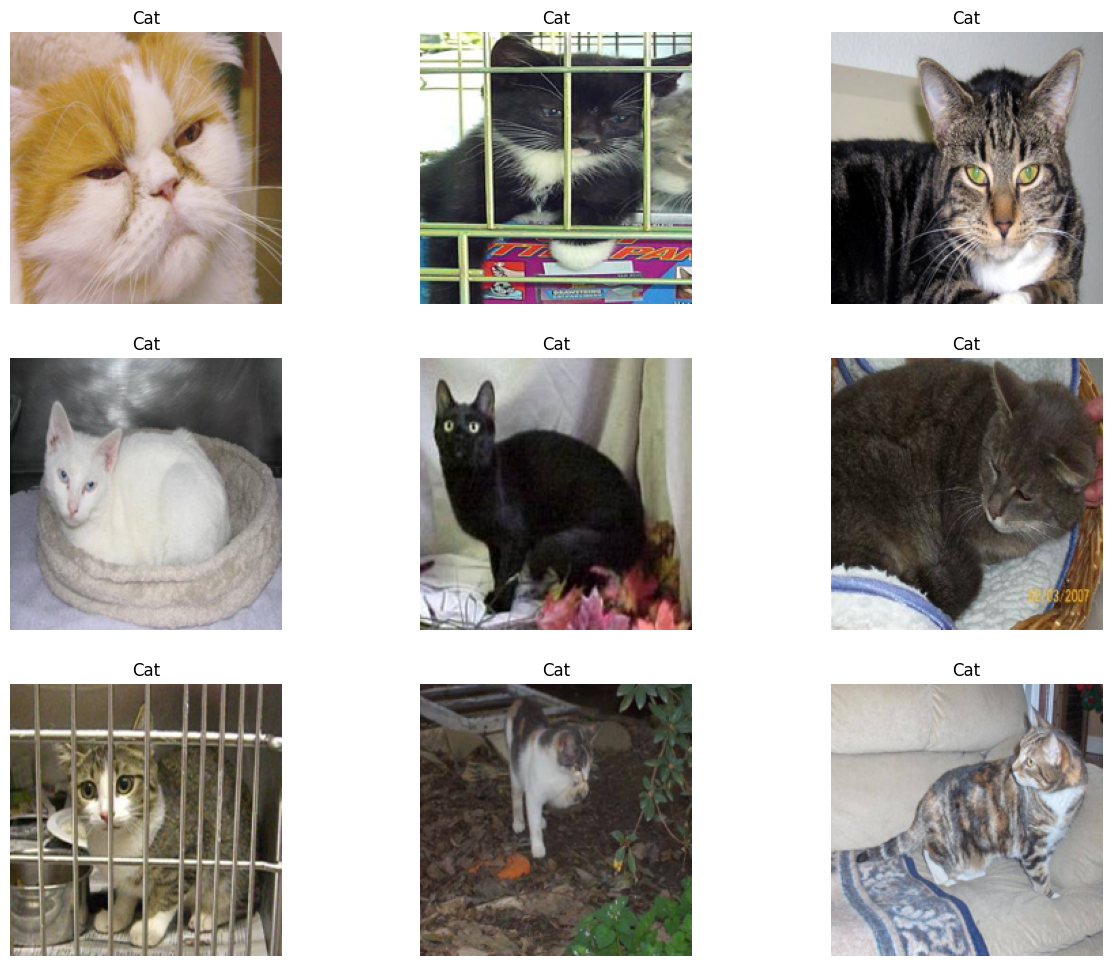

In [15]:
cat_images, cat_labels = load_images(train_dir, sample_count=20, label_filter='cat')
visualize_images(cat_images, cat_labels, sample_count=20)

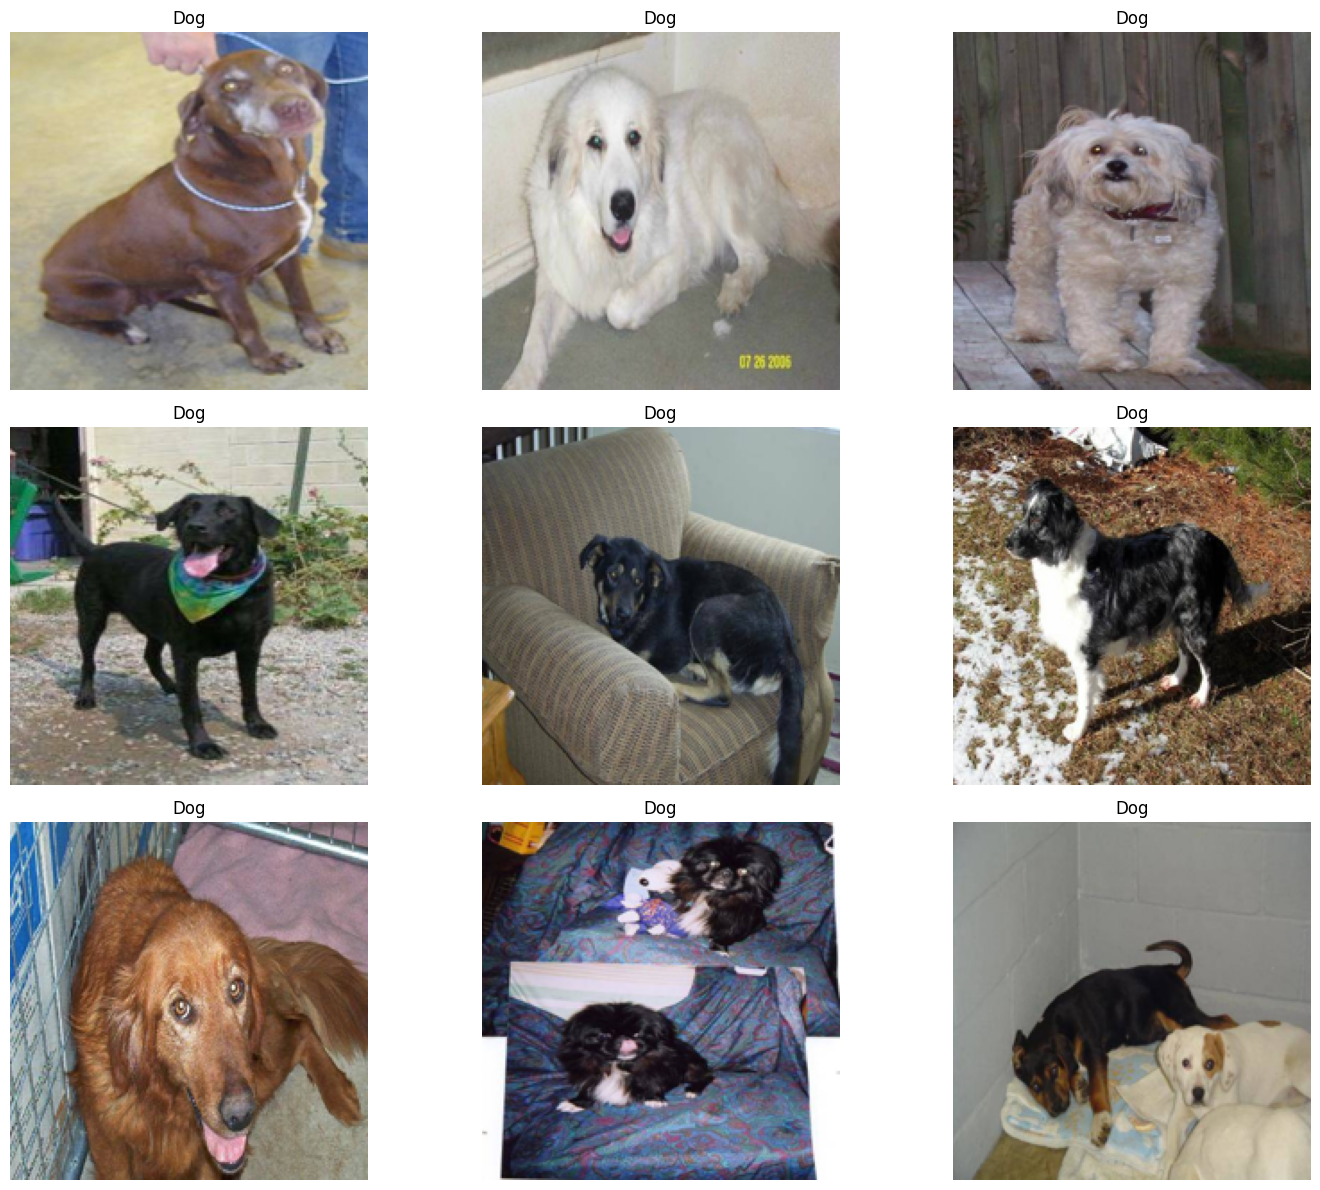

In [16]:
dog_images, dog_labels = load_images(train_dir, sample_count=9, label_filter='dog')
visualize_images(dog_images, dog_labels, sample_count=9)

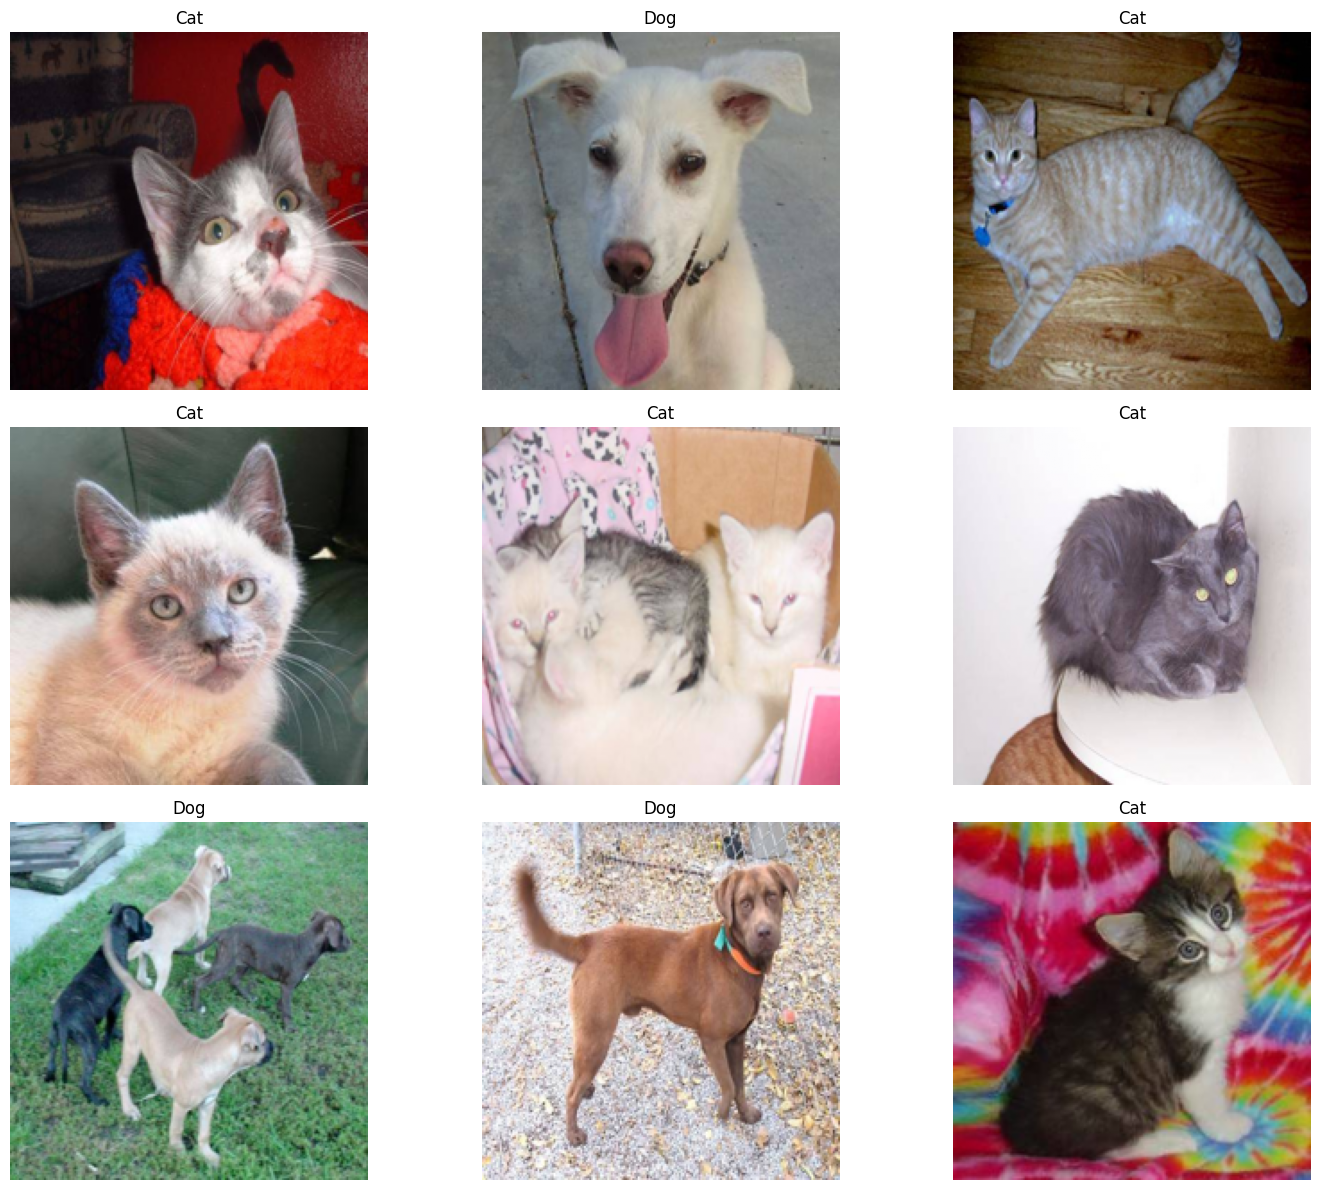

In [17]:
all_images, all_labels = load_images(train_dir, sample_count=9)
visualize_images(all_images, all_labels, sample_count=9)

In [58]:
image_path

'/content/train/train/dog.4465.jpg'

In [19]:
# Inicializa un DataFrame vacío
data_cat = []

In [20]:
for filename in os.listdir(train_dir):
    if filename.startswith('cat'):
        # Construir la ruta completa del archivo
        image_path = os.path.join(train_dir, filename)

        # Crear un diccionario con los datos de la imagen
        data = {
            'filename': filename,
        }

        # Añadir la fila al DataFrame
        data_cat.append(data)


In [21]:
# Crear el DataFrame a partir de la lista de diccionarios
df = pd.DataFrame(data_cat)

In [27]:
df["label"] = "cat"

In [28]:
# Mostrar el DataFrame
print(df)

            filename label
0       cat.8442.jpg   cat
1       cat.7026.jpg   cat
2      cat.10704.jpg   cat
3       cat.2661.jpg   cat
4       cat.6592.jpg   cat
...              ...   ...
12495  cat.11214.jpg   cat
12496   cat.7847.jpg   cat
12497  cat.10913.jpg   cat
12498   cat.2148.jpg   cat
12499   cat.5483.jpg   cat

[12500 rows x 2 columns]


In [23]:
# Inicializa un DataFrame vacío
data_dog = []

In [24]:
for filename in os.listdir(train_dir):
    if filename.startswith('dog'):
        # Construir la ruta completa del archivo
        image_path = os.path.join(train_dir, filename)

        # Crear un diccionario con los datos de la imagen
        data = {
            'filename': filename,
        }

        # Añadir la fila al DataFrame
        data_dog.append(data)

In [25]:
# Crear el DataFrame a partir de la lista de diccionarios
df_dog = pd.DataFrame(data_dog)

In [29]:
df_dog["label"] = "dog"

In [30]:
# Mostrar el DataFrame
print(df_dog)

            filename label
0       dog.7728.jpg   dog
1      dog.10395.jpg   dog
2        dog.984.jpg   dog
3       dog.1674.jpg   dog
4       dog.7840.jpg   dog
...              ...   ...
12495     dog.87.jpg   dog
12496  dog.10254.jpg   dog
12497    dog.773.jpg   dog
12498   dog.2140.jpg   dog
12499   dog.4465.jpg   dog

[12500 rows x 2 columns]


In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [38]:
datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

In [66]:
# Define a few rules for DataGen
train_dir = "../content/train/train/dog.4465.jpg"
image_size = (200, 200)

In [67]:
# Train Data Generation
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["dog", "cat"]
)

Found 0 images belonging to 2 classes.


In [55]:
# Test Data Generation
test_data = datagentest.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["test"]
)

Found 0 images belonging to 1 classes.


Paso 3: Construye una RNA

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten


In [32]:
model = Sequential()
model.add(Conv2D(input_shape = (224,224,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
# Move the Data through the Dense Layers
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

In [34]:
# Compile the Model using Adam
from keras.optimizers import Adam

# Compile the Model before Training
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])

In [65]:
# Train the Model
model.fit(train_data, epochs = 1)

ValueError: Must provide at least one structure

Paso 4: Optimiza el modelo anterior